### 1. We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize

In [2]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Min and max temperature')

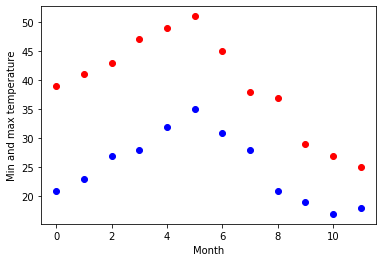

In [3]:
## Plotting the Max. and Min. temeprature with months 
months = np.arange(12)                          
plt.plot(months, Max, 'ro')
plt.plot(months, Min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [4]:
## FItting a periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

In [5]:
res_max, cov_max = optimize.curve_fit(yearly_temps, months,Max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,Min, [-40, 20, 0])

In [6]:
days = np.linspace(0, 12,365)

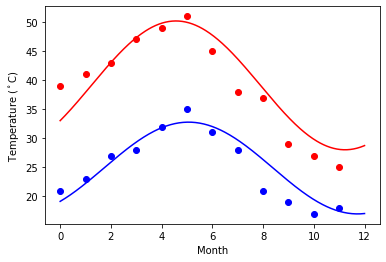

In [7]:
## Plotting the fitted periodic function
plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

### 2. Charts to plot using titanic dataset: 
#### 1. Create a pie chart presenting the male/female proportion
#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [8]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [9]:
titanic = pd.read_csv(url)  #Reading the dataset

In [10]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


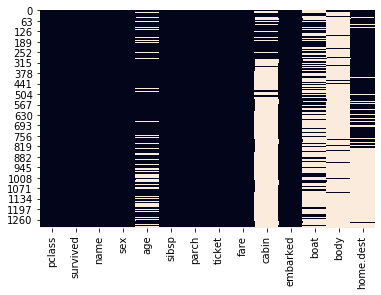

In [12]:
sns.heatmap(titanic.isnull(), cbar=False) ## Cheking for null values in the dataset

In [13]:
titanic['sex'].describe() # Exploring the 'sex' column

count     1309
unique       2
top       male
freq       843
Name: sex, dtype: object

In [14]:
titanic['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [15]:
sum(titanic['sex'].isnull()) #Checking for null values in the 'sex' column

1

In [16]:
titanic['sex'].isnull() #Checking for null values in the 'sex' column

0       False
1       False
2       False
3       False
4       False
        ...  
1305    False
1306    False
1307    False
1308    False
1309     True
Name: sex, Length: 1310, dtype: bool

In [17]:
titanic['sex']=titanic['sex'].fillna(titanic['sex'].mode()[0]) #Filling the null values in the 'sex' column with the mode

In [18]:
sum(titanic['sex'].isnull()) #Cheking the null values again after filling with the mode

0

In [19]:
## Creating a dataframe containg the proportion of males and females
proportion=pd.DataFrame(round((titanic['sex'].value_counts())/len(titanic['sex'])*100,2)).rename(columns={"sex":"Proportion in percentage"})

In [20]:
proportion

,Proportion in percentage
male,64.43
female,35.57


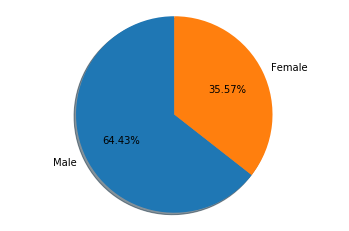

In [21]:
##Plotting the proportion data using pie plot
labels=['Male','Female']
sizes=list(proportion.iloc[:,0])
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%',shadow=True, startangle=90)
ax.axis('equal')
plt.show()

#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [22]:
titanic['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

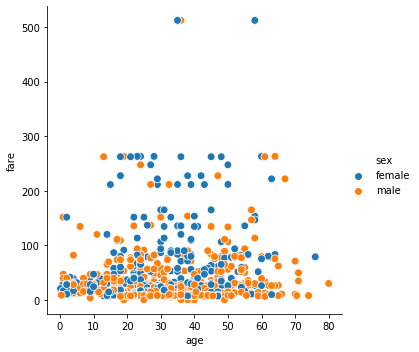

In [23]:
sns.relplot(data=titanic,y='fare',x='age',hue='sex',s=60)